#Tree-Based Methods
## Antonio Luna García de la Infanta (antonio.luna@gmail.com)


## Decission Trees

A decission tree is an acyclic graph that can be used to make decisions. In each branching node of the graph, a specific feature $j$ of the feature vector is examined.

The tree is grown through **recursive binary splitting**, by choosing a feature $j$ and a threshold $t$ to split the samples in two subsets: one for the left branch whose samples will have feature $j$ smaller than $t$, and the right branch with those samples with feature $j$ greater than or equal to $t$.

Trees can be used for **classification** and for **regression**. We will focus on classification , where trees look for features that best explain why the final class is chosen, given the values of the corresponding features.

·  | **Regression** | **Classification**
--- | --- | ---
$y_i$ assigned in leaf: | *mean* of the values in the leaf node |  *most commonly occurring class*
**measures**: | *RSS (residual sum of squares)* |  *Gini index* (G) <br> *Cross-Entropy* (D) <br> *Classification error rate* (E)



Importing necessary packages and mounting drive:

In [0]:
# Plotting library
import matplotlib.pyplot as plt
plt.style.use('default') # Plots will be displayed in default style   
# Numeric library
import numpy as np

# Data analysis library
import pandas as pd

# To clear outputs
from IPython.display import clear_output

# To print HTML
from IPython.display import HTML

# To use 3D plotting library (plotly): 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

def enable_plotly_in_cell():
    import IPython
    from plotly.offline import init_notebook_mode
    display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
    init_notebook_mode(connected=False)

clear_output()


In [35]:
# Create proper environment
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
# Files are located in PATH
PATH = 'drive/My Drive/MEFC - BBVA/T8 - Machine Learning/Trees and Ensembles/'

# To be able to import python files
import sys
sys.path.insert(0, PATH)

In [0]:
sys.path
clear_output()

In [37]:
from plot_image import plot_image

ModuleNotFoundError: ignored

### Trees for regression

Trees predict for regression through a **stratification of the feature space**, and then using the **average value** for each stratified region as prediction for all values that fall into that region.

>> 1. The predictor space, for the $p$ predictors $X_1, X_2, X_3, ... , X_p$, is divided into $J$ **non-overlapping regions**: $R_1, R_2, R_3, ... , R_J$. Therefore, $J$, the number of possible regions, is usually much bigger than the number of predictors, $p$
>> 2. The prediction for a sample that falls into region $R_j$ will be the **average** $\hat{y}_{R_j}$of the training observations that fell into that region $R_j$.

The $R_1 ... R_J$ regions will be those that minimize the RSS (residual sum of squares):

$$ \sum_{j=i}^J \sum_{i \in R_j } (y_i - \hat{y}_{R_j})^2 $$

being $\hat{y}_{R_j}$ the mean value of the training samples in region $R_j$

The process to follow is **recursive binary splitting**, a *top-down* and *greedy* strategy. Otherwise it would be unfeasible with so many possibilities of dividing the space. *Top-down* because we make a split at the top and then more splits beneath for the already divided region. And *greedy* because the split is optimal at that step, regardless of what happens with later splits.

Each **split** requires selecting which **predictor** $X_j$ to use, and which **value** $s$ to divide the space into the regions:

$$R_1(j,s) = \{X \mid X_j < s \}$$
$$R_2(j,s) = \{X \mid X_j \geq s\}$$

Looking for $j, s$ that minimizes the overall error with respect to their respectives mean values in each region:

$$ \sum_{i: x_i \in R_1(j,s)} (y_i - \hat{y}_{R_1})^2 + \sum_{i: x_i \in R_2(j,s)} (y_i - \hat{y}_{R_2})^2$$

The regions $R_j$ are stablished through successive splits during the sequential process, until a stop rule such as a minimum of $n_{min}$ samples is reached in a leaf.

[ref: http://www-bcf.usc.edu/~gareth/ISL  ]  

In [22]:
#@title Tree Branches
plot_image(PATH + 'TreeBranches.PNG', 10, 9)

NameError: ignored

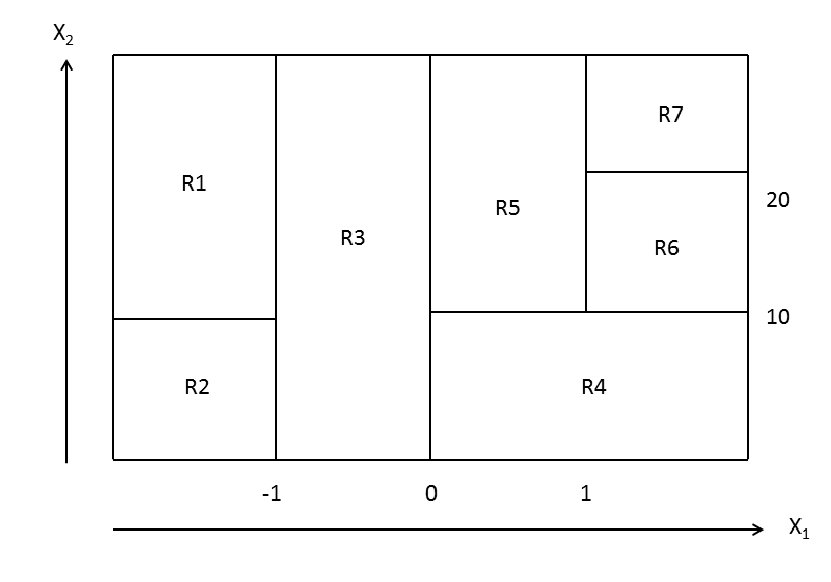

In [0]:
#@title Tree Regions
plot_image(PATH + 'TreeRegions.PNG', 10, 9)

#### Example: tree regression for sin(x) + noise

We will use now the tree as regression model to fit the following law:

$$ y = sin(x) + \epsilon $$

Where $\epsilon$ will be the noise responsible for *Bayesian error* 

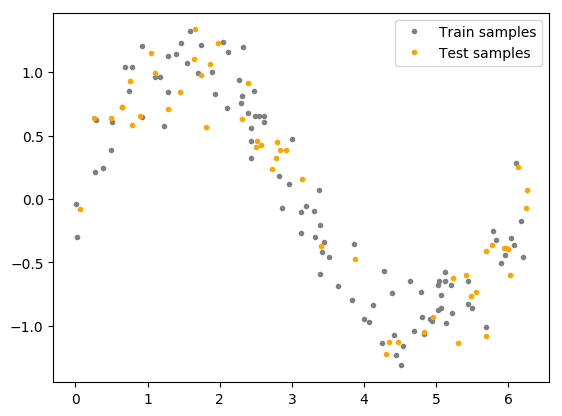

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import random
random.seed(111)

num = 150

x = np.random.uniform(0,2*np.pi, (num,1))
err = 0.2
y = np.sin(x) + err*np.random.normal(0,1,(num,1))

# We shuffle the data
x, y = shuffle(x, y)

# Splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split( \
                x, y, test_size=0.33, random_state=111)

plt.plot(x_train, y_train, '.', color = 'gray', label = 'Train samples');
plt.plot(x_test, y_test, '.', color = 'orange', label = 'Test samples');
plt.legend()

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree.export import export_text

def plot_tree_prediction(val_x, val_y, pred_y):
    x_testl = val_x.ravel() #[val[0] for val in val_x.tolist()]
    y_predl = pred_y.ravel() # [val for val in pred_y.tolist()]
    x_testl, y_predl = zip((*sorted(zip(x_testl, y_predl))))

    plt.plot(val_x, val_y, '.', color = 'red', label = 'Real Values');
    plt.plot(x_testl, y_predl, '*', color = 'blue', label = 'Tree prediction')
    plt.legend()

In [0]:
def Regression_TreeDepth(xtrain, ytrain, xtest, ytest, tree_depth, print_regions = False):

    tree_regr = DecisionTreeRegressor(random_state = 111, max_depth = tree_depth)

    # Fitting tree with train set
    tree_regr.fit(xtrain, ytrain)

    # Predicting with test set
    ypred = tree_regr.predict(xtest)

    print('Showing prediction for tree depth: ', tree_depth)
    plot_tree_prediction(xtest, ytest, ypred)
  
    if print_regions:
        sorted_walls = list(set(sorted(tree_regr.tree_.threshold)))
        sorted_walls = [val for val in sorted_walls if val > 0.0]
        for wall in sorted_walls:
            plt.axvline(x=wall)
  
    return tree_regr

We see that the prediction is very noisy, because the tree has divided the space according to what was learnt from the training set. Then,  with not-seen values of the test set, the tree will predict with the training set $\hat{y}_{R_j}$ average on each branch region $R_j$.

Showing prediction for tree depth:  2


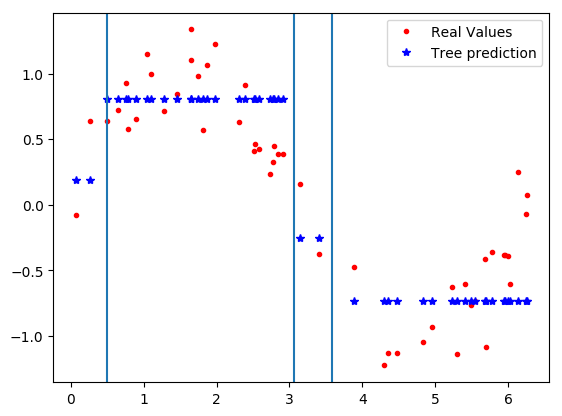

In [28]:
tree2 = Regression_TreeDepth(x_train, y_train, x_test, y_test, 2, True) # 2 - la profundidad del arbol
# Rojo - Conjunto train
# Azul - Conjunto Test
# Diferencias entre azul y rojo - Error

We increase the maximum depth allowed for the tree, to see how it captures more regions of the sinusoidal wave.

Showing prediction for tree depth:  3


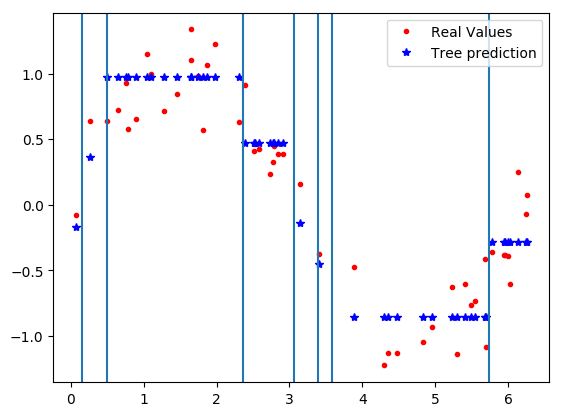

In [29]:
tree3 = Regression_TreeDepth(x_train, y_train, x_test, y_test, 3, True)
# Derivada es maxima cuando sube de valle a cumbre (o cuando baja - pero en negativo)

When the maximum tree depth is increased more, the tree creates many regions close to each other on the part of the function where $y$ changes more rapidly.

Showing prediction for tree depth:  5


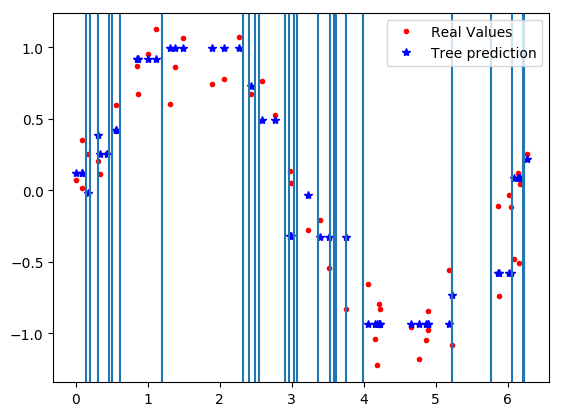

In [0]:
tree5 = Regression_TreeDepth(x_train, y_train, x_test, y_test, 5, True)

We can see the regions with the values $s$ chosen for optimal split on each branch, minimizing the RSS. Since this is a one-dimension problem, there is just one **single feature** $x$, no need to select among many features, just the split value $s$ at each step. And shows which is the mean value to use as prediction for each region.

In [30]:
r = export_text(tree3)

print(r) 

|--- feature_0 <= 3.06
|   |--- feature_0 <= 0.50
|   |   |--- feature_0 <= 0.15
|   |   |   |--- value: [-0.17]
|   |   |--- feature_0 >  0.15
|   |   |   |--- value: [0.37]
|   |--- feature_0 >  0.50
|   |   |--- feature_0 <= 2.36
|   |   |   |--- value: [0.97]
|   |   |--- feature_0 >  2.36
|   |   |   |--- value: [0.47]
|--- feature_0 >  3.06
|   |--- feature_0 <= 3.58
|   |   |--- feature_0 <= 3.39
|   |   |   |--- value: [-0.14]
|   |   |--- feature_0 >  3.39
|   |   |   |--- value: [-0.45]
|   |--- feature_0 >  3.58
|   |   |--- feature_0 <= 5.74
|   |   |   |--- value: [-0.86]
|   |   |--- feature_0 >  5.74
|   |   |   |--- value: [-0.28]



En este caso hay 3 niveles, es decir, tres preguntas para si el feature es mayor o menor

[Text(465.0, 336.875, 'X[0] <= 3.06\nentropy = 0.597\nsamples = 100\nvalue = -0.009'),
 Text(232.5, 240.625, 'X[0] <= 0.497\nentropy = 0.147\nsamples = 46\nvalue = 0.728'),
 Text(116.25, 144.375, 'X[0] <= 0.15\nentropy = 0.087\nsamples = 6\nvalue = 0.187'),
 Text(58.125, 48.125, 'entropy = 0.017\nsamples = 2\nvalue = -0.17'),
 Text(174.375, 48.125, 'entropy = 0.026\nsamples = 4\nvalue = 0.365'),
 Text(348.75, 144.375, 'X[0] <= 2.361\nentropy = 0.105\nsamples = 40\nvalue = 0.809'),
 Text(290.625, 48.125, 'entropy = 0.044\nsamples = 27\nvalue = 0.971'),
 Text(406.875, 48.125, 'entropy = 0.065\nsamples = 13\nvalue = 0.472'),
 Text(697.5, 240.625, 'X[0] <= 3.581\nentropy = 0.124\nsamples = 54\nvalue = -0.637'),
 Text(581.25, 144.375, 'X[0] <= 3.393\nentropy = 0.036\nsamples = 11\nvalue = -0.251'),
 Text(523.125, 48.125, 'entropy = 0.015\nsamples = 7\nvalue = -0.136'),
 Text(639.375, 48.125, 'entropy = 0.008\nsamples = 4\nvalue = -0.454'),
 Text(813.75, 144.375, 'X[0] <= 5.741\nentropy = 0.

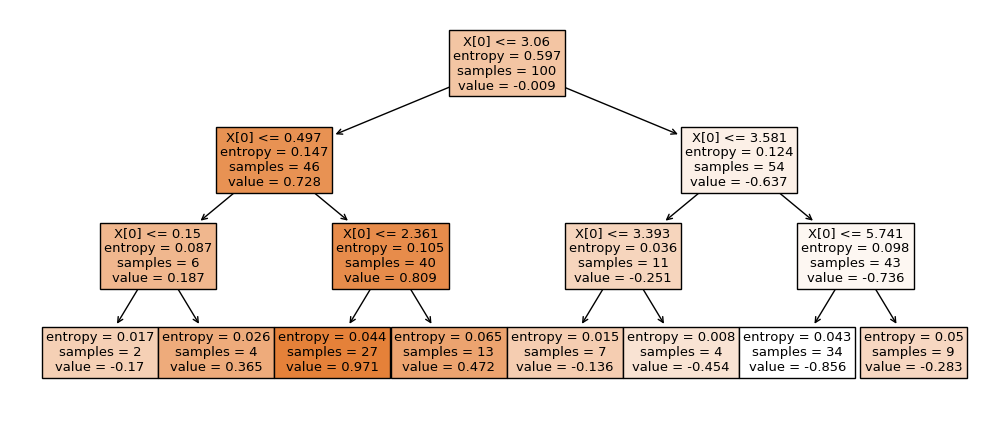

In [31]:
from sklearn import tree
plt.figure(figsize=(12,5))
tree.plot_tree(tree3, filled=True)

Valores blancos - Valores minimos \
Valores mas oscuros - Valores mas proximos a 1

### Trees for classification

While for regression the predicted value was the mean value in the region (leaf) where, according to the values of the features, the value to be predicted falls in the tree, for classification the predicted value will be the **most commongly occurring class** of training observations in that region. The tree will provide not only which is the most common class to be used as prediction, but also the **proportion** of that prevailing class among the other observations in the final leaf.

Here, there is no RSS as metric to be used when splitting the branches in the tree creation. For classification trees, there are other measures of **purity**, which is also seen as **information gain**, for the decission of which feature to use for the split and which value to check for that feature. 

For example, the *classification error rate*: the proportion of samples in the region that *do not* belong to the most common class. This and other measures of purity or information gain through a split, are described in the next section.

The features to use can be both categorical and numerical. When they are categorical, the algorithm for creating the tree must look for the category among all the other categories which increases most the information gain with that split.

#### Measures of information gain
The selection of the feature to be used use for splitting is the one with the largest **information gain**. This will be the most explicative or most useful feature for that split.

The *measures* that are chosen to calculate the **Information gain** are typically the **Gini impurity**, **Entropy** (H), or the **Classification error**. If we have $K$ possible output classes, in region $m$ the expressions for these measures are:

$$ Gini(E) =  1 - \sum_{k=1}^K  \hat{p}_{mk}^2 = \sum_{k=1}^K  \hat{p}_{mk}(1- \hat{p}_{mk})$$
$$ H(E) =  - \sum_{k=1}^K  \hat{p}_{mk} \, log_2 \,  \hat{p}_{mk}$$
$$ClassificationError = 1 - max_k \,( \hat{p}_{mk} )$$

where $\hat{p}_{mk}$ is the probability of ocurrence of class $k$ in the $m$*th* region, among all $K$ possible classes,  the proportion of training observations in the mth region that are from the kth class.

$G$ and $H$ will be near zero when the $\hat{p}_{mk}$ are all near zero or near one, which is the case of a node being very pure.

All these measures are maximum when the samples are more perfectly mixed, and they are closer to zero when  $\hat{p}_{mk}$ is either close to 0 or close to 1, providing clear confidence on the information of whether class $k$ is completely discarded or clearly chosen for region $k$, respectively.

A split involves selecting a feature in the dataset and a value. The split will result in two groups of dataset rows.  The decission of tree splitting, choosing among the possible features, is done by maximizing the **Information gain**, which is used to evaluate the splits. Information gain is the decrease in entropy, the difference of entropy before the split, and after the split averaging on the resulting two groups, *left* and *right*.

$$ IG(D_{parent}) = I(D_{parent}) - \frac{N_{left}}{N_p} I(D_{left}) - \frac{N_{right}}{N_p}I(D_{right}) $$

Where $I$ is the *Impurity*, a certain *measure* of how mixed are classes in the datasets, $D_{parent}$ is the dataset where we are performing the split, and $D_{left}$ and $D_{right}$ are the resulting datasets for that split. $N_{parent}$,  $N_{left}$, $N_{right}$ are the number of elements in the corresponding datasets.

Now we will plot the entropy as function of $p$, the fraction of training observations that do not belong to the most common class in that region. It can also be plot as function of the contrary, the fraction of observations belonging to the most common class.

**EXERCISE** Plot entropy formula for x-axis on $p \in (0,1]$

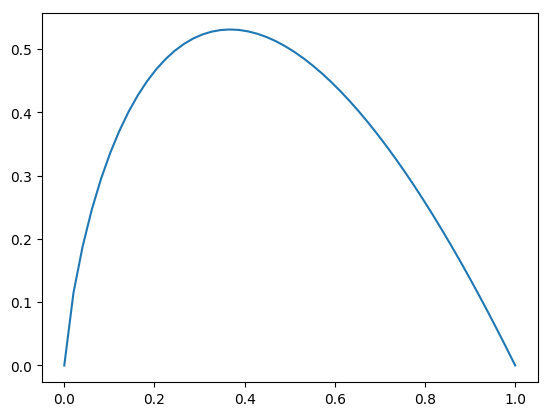

In [32]:
# use np.linspace from numpy to create an array of points from 1E-10 to 1.0
x = np.linspace(1E-10, 1.0, 50)

# Build the y-values of the formula with that x-axis
entropy = - x * np.log2(x)

# use then plt.plot to show the figure
plt.plot(x, entropy)


Both **Entropy** and **Gini** are maximal when the classes are perfectly mixed, which is a desirable characteristic for a training set for trees. If all samples where from the same class, the entropy would be zero.

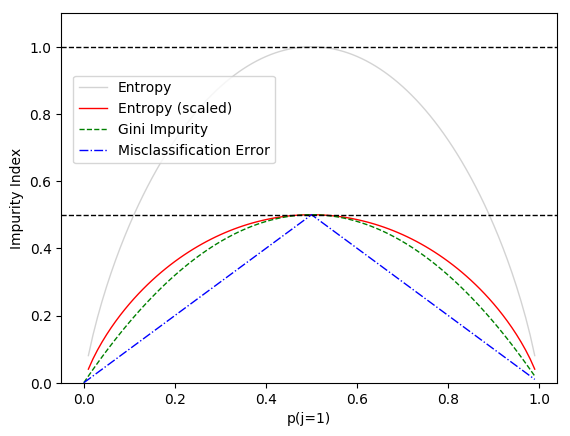

In [33]:
# https://www.bogotobogo.com/python/scikit-learn/scikt_machine_learning_Decision_Tree_Learning_Informatioin_Gain_IG_Impurity_Entropy_Gini_Classification_Error.php

import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def classification_error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
scaled_ent = [e*0.5 if e else None for e in ent]
c_err = [classification_error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for j, lab, ls, c, in zip(
      [ent, scaled_ent, gini(x), c_err],
      ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
      ['-', '-', '--', '-.'],
      ['lightgray', 'red', 'green', 'blue']):
        line = ax.plot(x, j, label=lab, linestyle=ls, lw=1, color=c)

ax.legend(loc='upper left', bbox_to_anchor=(0.01, 0.85),
         ncol=1, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

plt.ylim([0, 1.1])
plt.xlabel('p(j=1)')
plt.ylabel('Impurity Index')
plt.show()

### Tree Pruning

The procedure of growing the tree could be repeated until all nodes in leaves belong to the same class or we can not find a feature to split upon. We say that this method is an exhaustive and greedy algorithm, because the aim is to have all elements of the same class reunited as soon as possible in the same leaf.

However, this procedure can be very prone to **overfitting**, and therefore **pruning** will be a necessary technique to avoid overfitting to the *training* set, and hence get better results in the *test* set. 

#### Post-Pruning
Post-Pruning consists of going back once the full tree is grown, and then removing those branches with low information gain, replacing them with a leaf node, in classification trees. In regression trees, we can see it as a mechanism similar to Lasso regularization, with parameter $\alpha$ controlling the trade-off between tree complexity (overfitting) and robust and good results for the test set:

$$ \sum_{m=1}^{\mid T \mid} \sum_{x_i \in R_m} (y_i - \hat{y}_{R_m})^2 + \alpha \mid T\mid $$

where $\mid T \mid$ is the number of terminal nodes of tree $T$, searching for a subtree T that minimizes that expression, given an $\alpha$, and $\hat{y}_{R_m}$ is the predicted response in region $R_m$.

#### Pre-Pruning

We can also impose preemptive rules to prevent the tree to grow until overfitting realm.

To avoid overfitting on the training data, we can impose when the split process should stop, by setting a limit on:
 
  * Stop when the the information gain is smaller than an $\epsilon$
  * Stop when the tree reaches maximum depth $d$
  * Stop when the number of samples in the leaf is smaller than a certain imposed number to prune the tree, or when the leaf contains all elements from the same class (a pure final node leaf).

This is the pruning used by *scikit-learn*, imposing values for those parameters.

https://scikit-learn.org/stable/modules/tree.html
___

Recommended readings in Internet:

>> https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1
>> https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/
>> https://sebastianraschka.com/faq/docs/decisiontree-error-vs-entropy.html

>> https://www.python-course.eu/Regression_Trees.php 

### Advantages and disadvantages of decission trees

* **Advantages**
 - Very interpretable, even allows visual representation.
 - Suitable for non-linear problems
 - Prediction given a sample is very fast and straightforward.
 - Accepts both numerical and categorical features, even with missing values and little or no preprocessing at all.
 
* **Disadvantages**
  - Very prone to overfitting
  - Not very precise
  - Very biased with imbalance datasets.
  - it fails to include predictive power from multiple, overlapping regions of the feature space

## CDS dataset example: predicting the rating

We will use the dataset with CDS spreads to train a decission tree for classification, so that it can predict the rating given Debt Tier, Sector, Geography and Spread. The spread maturity chosen for this will be the most liquid tenor, 5y CDS. To ensure that the spread comparison is fair and equivalent accross the dataset, we will work with what we call the 'clean spread':

$$S_{\text{clean}}=\frac{S}{1-Rec}$$

Where $S$ is the 5yr CDS spread and $Rec$ the implied recovery rate.


### Data Preprocessing

This is also known as "feature engineering", it takes an important amount of developing time and where creativity,  domain knowledge and the experience working on data preparation previously is specially useful. 

This can comprise (see http://themlbook.com Chapter 5):

 - One-hot encoding
 - Binning
 - Normalization
 - Standardization
 - Dealing with Missing Features
 - Data imputation Techniques
 

In [34]:
# CDS_data = pd.read_csv(PATH + 'CDS_data.csv')
CDS_data = pd.read_csv(PATH + 'CDS_Same_Day_CDS_Europe_20190306.csv')

# We print the data columns
print(CDS_data.columns)

FileNotFoundError: ignored

In [0]:
# We are just interested in the columns that we are using as features 
# and the one we want to predict
CDS_data = CDS_data[['Tier', 'Sector', 'Region','AvRating', 'Spread5y', 'Recovery']] 

# We print the original length of the dataframe
print('Original dataframe length:', len(CDS_data))

# We get rid of rows with no rating or no 5yr spread. 
CDS_data.dropna(subset = ['Spread5y', 'AvRating'], inplace = True)

# For the remaining columns, we fill NAs with 'Unkown' keyword
CDS_data.fillna('Unknown', inplace=True)

# In the Sector column, there are some examples marked as 'Unclassified'.
# We change it to 'Unkown'
CDS_data.loc[CDS_data['Sector'] == 'Unclassified','Sector'] = 'Unknown'

# We convert both the CDS spread and the implied recovery rate to float
CDS_data['Spread5y'] = CDS_data['Spread5y'].str.rstrip('%').astype('float') / 100.0
CDS_data['Recovery'] = CDS_data['Recovery'].str.rstrip('%').astype('float') / 100.0

# We get rid of defaulted names
CDS_data = CDS_data[CDS_data['AvRating']!='D']

# We add the clean spread column
CDS_data['Clean Spd'] = CDS_data['Spread5y'] / (1-CDS_data['Recovery'])

# We print the length of the dataframe we are working with
print('NA filtered dataframe length:', len(CDS_data))


Original dataframe length: 8596
NA filtered dataframe length: 7444


In [0]:
CDS_data.head()

,Tier,Sector,Region,AvRating,Spread5y,Recovery,Clean Spd
0,SNRFOR,Consumer Goods,N.Amer,BBB,0.009850,0.35,0.015154
1,SNRFOR,Consumer Goods,N.Amer,BBB,0.009516,0.35,0.014640
2,SNRFOR,Basic Materials,Africa,BB,0.020208,0.40,0.033679
3,SNRFOR,Basic Materials,Africa,BB,0.020208,0.40,0.033679
4,SNRFOR,Basic Materials,Africa,BB,0.020208,0.40,0.033679


In [0]:
# Checking resulting dataframe, without NaN, which have been replaced for 'Unknown'
CDS_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7444 entries, 0 to 8595
Data columns (total 7 columns):
Tier         7444 non-null object
Sector       7444 non-null object
Region       7444 non-null object
AvRating     7444 non-null object
Spread5y     7444 non-null float64
Recovery     7444 non-null float64
Clean Spd    7444 non-null float64
dtypes: float64(3), object(4)
memory usage: 465.2+ KB


#### Dataset with spreads for all tenors (not used)

In decision trees there is no need to normalize the numerical columns. 

We are using the spread of just one tenor, the '5y', which is the most liquid in market. If we were going to use the rest of tenors, there are many missing values because they are not so liquid in market. In this case, we could be tempted to interpolate and extrapolate those missing tenors along each row with the existing spread tenors for that row. For the interpolation axis we can use the tenor as date x-axis . Of course, this would have more sense than mixing spreads of all ratings (rows) for the same column with a simple mean over the column, because this would fill the missing values with non-sense values in comparison with the other spreads of that row.

However, we are not going to use those columns, and even if we used them, it may be better for the learning algorithm to be exposed to those unknown missing tenors, because they provide meaningful information of lack of liquidity in the market for those names and tenors. Filling them with interpolated values is an artificial preparation that would introduce more noise to the real problem.

The missing information for certain maturities could be used as indicator of how liquid that credit name is. This means that it can therefore be valuable information to predict the rating, suppossing that similar ratings have those CDS tenors missing, too.


**NOTE:** next code section is not used. We provide the commented code just to show how to do this interpolation with pandas library.

The missing values in the spread columns could be interpolated from the available information of other tenors on the same row. For this, we will transpose the 'Spread' columns, transform the names into numerical values as x-axis to interpolate the missing CDS spreads, and bring this filled columns back to the dataframe


In [0]:
# spreadCol_list = [name for name in df_euro.columns.tolist() if 'Spread' in name  ]


In [0]:
# # There are NaN even in the most liquid column, the 5y spreads
# print(df_cds['Spread5y'].isna().sum())

# # Let's see the number of NaN for each Spread column:
# def printNaN_SpreadCols(col_list, df):
#   for tenor in col_list:
#     num_nan = df[tenor].isna().sum()  
#     print('Number of NaN in column ', tenor, ': ', num_nan, '  Percentage: ', \
#           "{0:.2f}".format((num_nan / df.shape[0]) * 100), '%')
    
# printNaN_SpreadCols(spreadCol_list, df_cds)

In [0]:
# We will interpolate on the tenors, transposing the 'Spread' columns
# indexes can not be float, so we will divide everything by 0.5, 
# because the interpolation on these doubled-scaled indexes will be equivalent

# list_DblTenors = [int(name.lstrip('Spread').rstrip('y').rstrip('m')) for name in spreadCol_list]
# list_DblTenors = (np.array(list_DblTenors) * 2).tolist()
# list_DblTenors[0] = 1

# df_spreads = df_euro[spreadCol_list].T
# df_spreads = df_spreads.set_index(pd.Series(list_DblTenors))
# df_spreads = df_spreads.interpolate(method='values', limit_direction = 'both')
# df_spreads = df_spreads.T

In [0]:
        # Fortunately, pandas interpolates not only forwards, but in both directions now. Otherwise:
        # df_spreads_reverse = df_spreads.reindex(index=df_spreads.index[::-1])
        # df_spreads_reverse = df_spreads_reverse.interpolate(method='values')
        # df_spreads = df_spreads_reverse.reindex(index=df_spreads_reverse.index[::-1])    

In [0]:
# # Let's see one example of the extrapolated values for missing spreads 
# (this was checked when using ImmpliedRating instead of AvRating... now rows will have changed
# print(df_spreads[482])
# print(df_cds.iloc[482])
# # df_spreads.columns[df_spreads.isna().any()].tolist()

In [0]:
# # Checking that there are no NaN values on the Spread columns now
# printNaN_SpreadCols(list_DblTenors, df_spreads)

In [0]:
# # Setting the interpolated data back into the original dataframe

# # The 6m row must be set manually
# df_cds['Spread6m'] = df_spreads[1]

# # For the rest, we will use the zip method
# for doubleTenor, label in zip(list_DblTenors[1:], spreadCol_list[1:]):
#   df_cds[label] = df_spreads[doubleTenor]

In [0]:
# printNaN_SpreadCols(spreadCol_list, df_cds)

#### One-hot encoding

We will transform the categorical columns into so many columns as categories in each column. If we were going to use other models that require matrix inversion, for example, then for N categories in a column there should be exactly N-1 independent one-hot columns.

However, since we are dealing with models that allow inter-dependent columns, for visual simplicity of the dataframe, we keep N one-hot columns for N categories.

We will create now a dataframe with one-hot columns from the categories, and we will use it to get train, validation and test sets. 

Later, we will see how pipes can manage the original dataframe with categories, because the one-hot encoding will be one of the first pipeline steps.

In [0]:
# This dataframe with one-hot categories, to be used directly 
# by the learning models. For pipes, we will use the original data
# because the one-hot encoding wil be part of the pipe.
df_numeric = pd.get_dummies(CDS_data, columns=['Tier', 'Sector','Region'])

# https://stackoverflow.com/questions/42819460/what-is-the-difference-between-onevsrestclassifier-and-multioutputclassifier-in

In [0]:
df_numeric.head()

,AvRating,Spread5y,Recovery,Clean Spd,Tier_SECDOM,Tier_SNRFOR,Tier_SNRLAC,Tier_SUBLT2,Sector_Basic Materials,Sector_Consumer Goods,Sector_Consumer Services,Sector_Energy,Sector_Financials,Sector_Government,Sector_Healthcare,Sector_Industrials,Sector_Technology,Sector_Telecommunications Services,Sector_Utilities,Region_Africa,Region_Asia,Region_Caribbean,Region_E.Eur,Region_Europe,Region_India,Region_Lat.Amer,Region_MiddleEast,Region_N.Amer,Region_Oceania,Region_OffShore,Region_Supra
0,BBB,0.009850,0.35,0.015154,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,BBB,0.009516,0.35,0.014640,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,BB,0.020208,0.40,0.033679,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,BB,0.020208,0.40,0.033679,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,BB,0.020208,0.40,0.033679,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [0]:
ratings = sorted(list(set(CDS_data['AvRating'].values)))
print(ratings) 

['A', 'AA', 'AAA', 'B', 'BB', 'BBB', 'CCC']


Although the ratings have the characteristic of following an order of credit quality, and we could save memory and dimensionality by using **Label encoding** instead of **One-hot encoding**, the resulting numbers would imply for the algorithm that 'CCC' is worth a certain amount more than 'BBB' or 'AA', and we want to avoid this simplification. Therefore, we will work with a one-hot encoding scheme using *label_binarize*.

https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor

https://stackoverflow.com/questions/50473381/scikit-learns-labelbinarizer-vs-onehotencoder

If we were going to use *Label encoding*, the ordering should be re-arranged on the ratings above, which have been alphabetically sorted by the command `sorted`, but do not follow the real precedence order. Even though using a binarization scheme, we re-arrange them for future ease of use and reference in the results.


In [0]:
ratings = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC'] # Es un clasificador para cada rating lo que haremos

#### Transformers for pipes

We will implement here our own transformers for pipelines. We have mixed categorical and numeric columns, and the one-hot encoder transformer expects all columns to be categorical. Therefore, we create two transformers for one-hot encoding, both having as input the columns that are categorical.

One of the one-hot transformers will get the categories through the fit method. But this has an important drawback: **the test set may have categories not seen in train!** 

To avoid this problem, the other transformer will get a dictionary of the columns with their possible categories explicitly listed. This transformer will be prepared for the test set in case there are new categories there not seen in train.

Finally, we will implement a transformer to apply the logarithmn to a specified numeric column, avoiding log(0) exception.

In [0]:
from pandas import Categorical, get_dummies
from sklearn.base import TransformerMixin, BaseEstimator

# This transformer automatically discovers the categories in a 
# categorical column during the fit process.
# However, this has a drawback!...
# there could be categories not seen in train, but found in test!
class OneHot_CDSCategories(BaseEstimator, TransformerMixin):
    """One hot encoder for all categorical features"""
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        categs = {}
        for column in self.attribute_names:
            categs[column] = X[column].unique().tolist()
        self.categoricals = categs
        return self

    def transform(self, X, y=None):
        df = X.copy()
        for column in self.attribute_names:
            df[column] = Categorical(df[column], categories=self.categoricals[column])
        new_df = get_dummies(df, columns=self.attribute_names)
        # in case we need them later
        self.columns = new_df.columns
        return new_df

# This transformer has an empty fit, and instead we provide 
# a dictionary with the categories for each categorical column
class OneHot_CDSCategoriesProvided(BaseEstimator, TransformerMixin):
    """One hot encoder for all categorical features"""
    def __init__(self, categories_dict):
        self.categories_dict = categories_dict
        self.attribute_names = list(self.categories_dict.keys())
        
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        df = X.copy()
        for column in self.attribute_names:
            df[column] = Categorical(df[column], categories=self.categories_dict[column])
        new_df = get_dummies(df, columns=self.attribute_names)
        # in case we need them later
        self.columns = new_df.columns
        return new_df      
      
class TransformSpreadToLog(BaseEstimator, TransformerMixin):
  
    def __init__(self, spreadColName):
        self.spreadColName = spreadColName
    
    def fit(self, X, y=None):
        return self
  
    def transform(self, X, y=None):
        df = X.copy()
        df[self.spreadColName] = df[self.spreadColName].apply(lambda x: np.log(x) if x > 0.0 else 0.0)
        return df

fit - Ajuste sobre el conjunto de training (decide las betas en el modelo de regresion o define los cortes en un arbol)

tansform - Sobre el conjuunto de train transforma los datos (por ejemplo tranformación logaritmica)

predict - Se usa para predecir

In [0]:
col_categ = ['Tier', 'Sector','Region']

# To check the transformers:

categoriesProcess = OneHot_CDSCategories(col_categ)
cols_onehot = categoriesProcess.fit_transform(CDS_data).columns.tolist()
cols_onehot

['AvRating',
 'Spread5y',
 'Recovery',
 'Clean Spd',
 'Tier_SNRFOR',
 'Tier_SNRLAC',
 'Tier_SUBLT2',
 'Tier_SECDOM',
 'Sector_Consumer Goods',
 'Sector_Basic Materials',
 'Sector_Healthcare',
 'Sector_Consumer Services',
 'Sector_Industrials',
 'Sector_Financials',
 'Sector_Utilities',
 'Sector_Technology',
 'Sector_Government',
 'Sector_Telecommunications Services',
 'Sector_Energy',
 'Region_N.Amer',
 'Region_Africa',
 'Region_Europe',
 'Region_Asia',
 'Region_MiddleEast',
 'Region_Supra',
 'Region_OffShore',
 'Region_Lat.Amer',
 'Region_Oceania',
 'Region_E.Eur',
 'Region_India',
 'Region_Caribbean']

In [0]:
# We impose the categories order, although it can be done automatically
categories_dict = {
    'Tier': ['SNRFOR','SUBLT2','SECDOM','SNRLAC'], 
    'Sector': ["Unknown", "Financial", "Industrial", "Consumer Cyclical", 
               "Communications and Technology", "Consumer Stable", "Utilities", 
               "Government", "Energy", "Materials"],
    'Region': ["N.Amer","Europe","Asia","Lat.Amer","MiddleEast","Oceania",
               "E.Eur","India","OffShore","Africa","Supra","Caribbean"]}

# Rating is the output
#     'AvRating': ['AAA','AA','A','BBB','BB','B','CCC'] }

categoriesProcess = OneHot_CDSCategoriesProvided(categories_dict)
cols_onehot = categoriesProcess.fit_transform(CDS_data).columns.tolist()
cols_onehot

['AvRating',
 'Spread5y',
 'Recovery',
 'Clean Spd',
 'Tier_SNRFOR',
 'Tier_SUBLT2',
 'Tier_SECDOM',
 'Tier_SNRLAC',
 'Sector_Unknown',
 'Sector_Financial',
 'Sector_Industrial',
 'Sector_Consumer Cyclical',
 'Sector_Communications and Technology',
 'Sector_Consumer Stable',
 'Sector_Utilities',
 'Sector_Government',
 'Sector_Energy',
 'Sector_Materials',
 'Region_N.Amer',
 'Region_Europe',
 'Region_Asia',
 'Region_Lat.Amer',
 'Region_MiddleEast',
 'Region_Oceania',
 'Region_E.Eur',
 'Region_India',
 'Region_OffShore',
 'Region_Africa',
 'Region_Supra',
 'Region_Caribbean']

#### 3 Sets: train, validation, test

The **test** set is now isolated and stored without being used until the final assessment. The rest will be the full training set, which will at the same time be divided into **train** and **validation** sets. Once the model is selected after iterating through trainings and cross validations with the train and validation sets, the **full train** set (comprising train+validation) will be used the fit the final model. And this final model will be assessed with the reserved test set.


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
import random

X = df_numeric.drop(['AvRating'], axis=1)
# Applying logarithm to the Clean spread.
X['Clean Spd'] = X['Clean Spd'].apply(lambda x: np.log(x) if x > 0.0 else 0.0)
Y = df_numeric['AvRating']
Y = label_binarize(Y, classes = ratings)
# Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33, random_state=0)

# We shuffle the data
random.seed(111)
X, Y = shuffle(X,Y)

# In capital letters, the full train set and the final test set
#  TEST SET COMPLETELY ISOLATED FROM NOW ON, UNTIL THE FINAL ASSESSMENT
XtrainFull, Xtest, YtrainFull, Ytest = train_test_split(X, Y, test_size=0.15, random_state=111)

# In small letters, the smaller train set and validation set from XtrainFull
x_train, x_val, y_train, y_val = train_test_split(XtrainFull, YtrainFull, test_size=0.15, random_state=111)
  

We will see that the values of the clean spread are distributed very concentrated and with outliers that could potentially worsen both a basic model with bias, and also a complex model with variance.

We will use the **logarithm of the clean spread** instead, whose distribution, as shown below, is more informative.

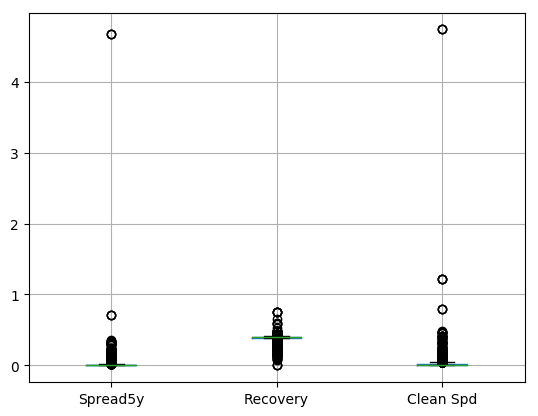

In [0]:
CDS_data.boxplot()

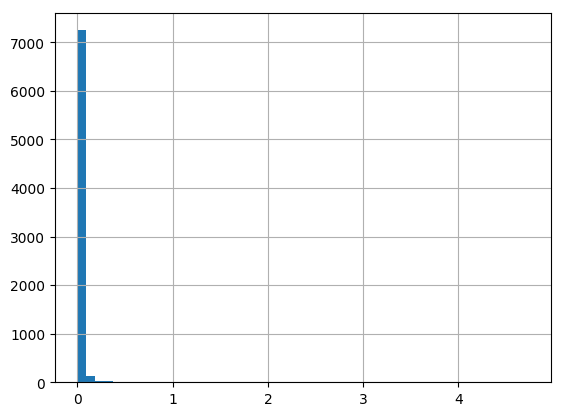

In [0]:
CDS_data['Clean Spd'].hist(bins = 50)

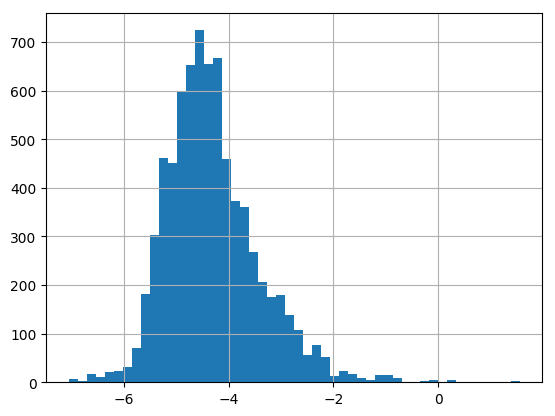

In [0]:
# Let's see the transformation of the values with logarithm
logtransform = TransformSpreadToLog('Clean Spd')
dflog = logtransform.fit_transform(CDS_data)
dflog['Clean Spd'].hist(bins = 50)

## EXERCISE: DecissionTreeClassifier from scikit-learn

We are going to use the implementation of *scikit-learn* for the tree classifier. This implementation prunes with pre-prune approach, imposing limits for the tree growth through parameters such as the maximum tree depth, the minimum number of samples in a leaf, or the minimum impurity decrease in a split.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [0]:
from sklearn.tree import DecisionTreeClassifier

# Set random seed
np.random.seed(1770)

# Create instance of DecisionTreeClassifier with criterion = 'gini'
ratingTree = DecisionTreeClassifier(criterion='gini')

# Fit the model with the training set x_train, y_train
ratingTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
# Get the score with validation set
# Using the validation set, because we are about to change the model for 'entropy'
# and we want to see the score with validation set to compare later with the score
# using 'entropy'

ratingTree.score(x_val, y_val)

0.8778947368421053

In [0]:
# New instance of the DecisionTreeClassifier with criterion 'entropy'
ratingTree = DecisionTreeClassifier(criterion='entropy')

# Fit the model with training set
ratingTree.fit(x_train, y_train)

# Check accuracy score with validation set
ratingTree.score(x_val, y_val)

0.8810526315789474

In [0]:
# Equivalent way with an explicit step obtaining the predictions on validation set
from sklearn import metrics

# Get a prediction for validation set
y_predVal = ratingTree.predict(x_val)

# Use metrics.accuracy_score to check the accuracy of the prediction
print("Accuracy:", metrics.accuracy_score(y_val, y_predVal))

Accuracy: 0.8810526315789474


This is the quality of the fit measured on the validation set. Then, we woul change the hyperparameters manually, re-fit again the altered model with the train set, and see the new score on validation set.

But we can perform **cross-validation** to reduce the variance of the score:

In [0]:
from sklearn.model_selection import cross_val_score
# Checking now with cross validationg score
cv_score_tree = cross_val_score(ratingTree, XtrainFull, YtrainFull, cv=10, n_jobs=-1)

In [0]:
print('Cross validation score, mean:', cv_score_tree.mean())
print('Cross validation score, std: ', cv_score_tree.std())

Cross validation score, mean: 0.8760808486811846
Cross validation score, std:  0.01100129650954247


### Elbow criterion to choose optimal tree depth

In [0]:
maxdepth = 20

elbow_x = np.array([])
elbow_yval = np.array([])
elbow_ytrain = np.array([])
elbow_ycv = np.array([])

for iter_depth in range(1, maxdepth):
  iter_tree = DecisionTreeClassifier(criterion='gini', max_depth=iter_depth, random_state = 7)
  iter_tree.fit(x_train, y_train)
  
  iter_errorval = 1.0 - iter_tree.score(x_val, y_val)
  iter_errortrain = 1.0 - iter_tree.score(x_train, y_train)
  #https://scikit-learn.org/0.15/modules/model_evaluation.html#prediction-error-metrics
  
  iter_cv_score = cross_val_score(iter_tree, XtrainFull, YtrainFull, cv=5, n_jobs=-1)
  
  elbow_x = np.append(elbow_x, iter_depth)
  elbow_yval = np.append(elbow_yval, iter_errorval)
  elbow_ytrain = np.append(elbow_ytrain, iter_errortrain)
  elbow_ycv = np.append(elbow_ycv, 1.0 - iter_cv_score.mean())


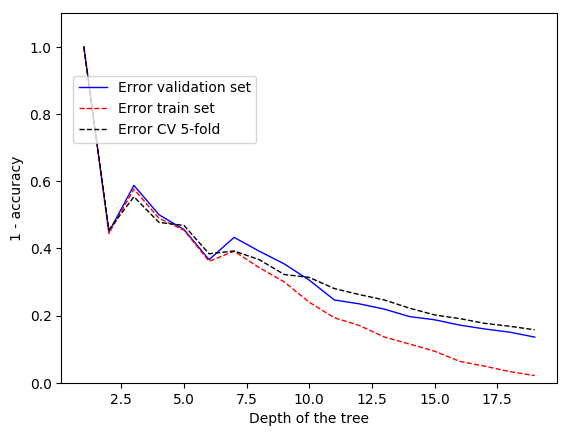

In [0]:
fig = plt.figure()
ax = plt.subplot(111)

for j, lab, ls, c, in zip(
      [elbow_yval, elbow_ytrain, elbow_ycv],
      ['Error validation set', 'Error train set', 'Error CV 5-fold'],
      ['-', '--', '--'],
      ['blue', 'red', 'black']):
   line = ax.plot(elbow_x, j, label=lab, linestyle=ls, lw=1, color=c)

ax.legend(loc='upper left', bbox_to_anchor=(0.01, 0.85),
         ncol=1, fancybox=True, shadow=False)

plt.ylim([0, 1.1])
plt.xlabel('Depth of the tree')
plt.ylabel('1 - accuracy')
plt.show()


In [0]:
# To use 3D plotting library (plotly): 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

enable_plotly_in_cell()
  
trace_val = go.Scatter(
  x = elbow_x,
  y = elbow_yval,
  mode = 'lines+markers',
  name = 'Validation 1-acc')

trace_train = go.Scatter(
  x = elbow_x,
  y = elbow_ytrain,
  mode = 'lines+markers',
  name = 'Train 1-acc')

trace_cv = go.Scatter(
  x = elbow_x,
  y = elbow_ycv,
  mode = 'lines+markers',
  name = 'CV 5-fold 1-acc')

data = [trace_val, trace_train, trace_cv]

layout = dict(title = 'Elbow criterion for tree depth',
              xaxis = dict(title = 'Tree depth'),
              yaxis = dict(title = '1 - accuracy'), 
             )

fig = dict(data=data, layout=layout)
iplot(fig)

# iplot(data)
# iplot([{"x": elbow_x, "y": elbow_yval}])


Now we will apply the *DecisionTreeClassifier* to the reduced dataset with just the 5y spread values, the currency, sector and geography. Then, we will show which is the predicted rating for each rating value.

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
             
steps_tree = [('LogSpread', TransformSpreadToLog('Clean Spd')),
              ('CategOneHot', OneHot_CDSCategoriesProvided(categories_dict)),
              ("tree", DecisionTreeClassifier())]

# OneHotEncoder as step would require all columns to be categories
# and we are mixing the 'Clean Spd' numeric column
# ('OneHot', OneHotEncoder(sparse=False, categories = categories, handle_unknown  = 'error')),

# If we use OneHot_CDSCategories as this step in the pipe,
# ('CategOneHot', OneHot_CDSCategories(col_categ)),
# we could face the problem that .fit would find just some of the categories,
# those present in the train samples, and may not be present all of them! 
# To avoid this problem, we declare all categories above              

treepipe = Pipeline(steps=steps_tree)

# Dropping columns Recovery and Spread5y because they are already in Clean Spd
# Using the suffix 'raw' to denote that the columns are the original categories
# and the one-hot-encoder must be applied as a step in the pipe
# Using "Full" to denote that there is no validation set. To be used with CV
XtrainFull_raw, Xtest_raw, YtrainFull_raw, Ytest_raw = train_test_split( \
  CDS_data[['Tier', 'Sector','Region','Clean Spd']], \
  CDS_data['AvRating'], test_size=0.2, random_state=1)

XtrainFull_raw, YtrainFull_raw = shuffle(XtrainFull_raw, YtrainFull_raw, random_state = 1770) # https://www.bthvn2020.de

treepipe.fit(XtrainFull_raw, YtrainFull_raw)

from sklearn import metrics
y_predVal = treepipe.predict(Xtest_raw)
print("Accuracy:", metrics.accuracy_score(Ytest_raw, y_predVal))

Accuracy: 0.8556077904633983


In [0]:
#@title Predicted Ratings for Ccy, Sector, Region, Country { run: "auto", vertical-output: true }
Tier = "SNRFOR" #@param ['SECDOM', 'SNRFOR', 'SNRLAC', 'SUBLT2']
Sector = "Financials" #@param ['Basic Materials', 'Consumer Goods', 'Consumer Services', 'Energy', 'Financials', 'Government', 'Healthcare', 'Industrials', 'Technology', 'Telecommunications Services', 'Utilities']
Region = "N.Amer" #@param ['Supra', 'Europe', 'Asia', 'Caribbean', 'N.Amer', 'Africa', 'Oceania', 'Lat.Amer', 'MiddleEast', 'E.Eur', 'India', 'OffShore']
Spread = 0.0285 #@param {type:"slider", min:0, max:0.1, step:0.0005}

# To list the categories of a column:
# sorted(list(set(df_euro['Region'].values)))

def dfRowWithInputValues(row_values, df_parent):
  row_df = pd.DataFrame(columns = list(df_parent.columns)) 
  row_df.loc[-1] = row_values
  row_df.index = row_df.index + 1
  return row_df

values_sample = [Tier, Sector, Region, Spread]

row_test = dfRowWithInputValues(values_sample, Xtest_raw)
row_test

,Tier,Sector,Region,Clean Spd
0,SNRFOR,Financials,N.Amer,0.0285


In [0]:
# We see now which rating is predicted by our model for this combination
row_pred = treepipe.predict(row_test)
row_pred[0]

'BB'

In [0]:
def PlotRatingStair(pipe):
  sp_X = np.arange(0.0, 0.0800, 0.0010)
  sp_Y = []
  sp_pred = []
  num_ratings = len(ratings)

  for sp in sp_X:
      row_test['Clean Spd'] = sp
      row_pred = pipe.predict(row_test)    
      sp_Y.append(num_ratings - ratings.index(row_pred[0]))
      sp_pred.append(row_pred[0])
  #     print('Spread: ' + '%.5f' % sp  + ', Rating: ' + row_pred[0])
  
  plt.plot(sp_X, sp_Y, '.')
  plt.yticks(np.arange(len(ratings)), ratings[::-1])
  plt.xlabel('Log of clean spread')

Plotting the predictions on a x-axis of log(Clean Spread), the the Tier, Sector and Geography selected above:

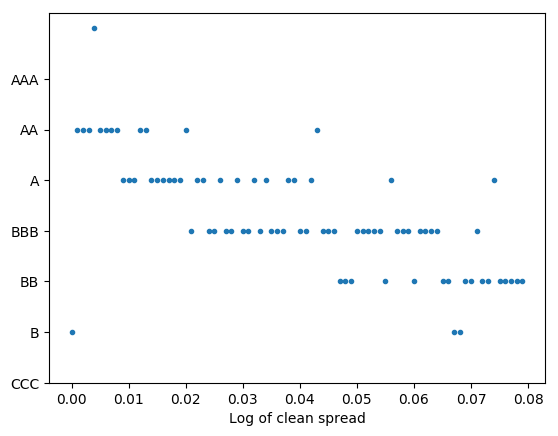

In [0]:
PlotRatingStair(treepipe)

**NOTE on the overfitting case**
There is a sample at spread = 0.0 being predicted as 'B'. This is a clear case of overfitting to a meaningless sample.

We will now used a more advanced model, which is explained later, the **RandomForestClassifier**, to see that a more robust model, not so simple, yields a neater and more credible prediction stair for the ratings. The span of the points (width of the step) is better delimited, and we can say more clearly the range of spreads that would correspond to a certain rating. However, we still see outliers, for example for rating 'A'.

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 2000,
                            # max_features = 'auto' for sqrt(num_features)
                            # criterion = 'entropy',
                            # min_samples_leaf = 5,
                            max_depth = 10, 
                            random_state = 111)

steps_rf = [('LogSpread', TransformSpreadToLog('Clean Spd')),
            ('CategOneHot', OneHot_CDSCategoriesProvided(categories_dict)),
            ("RandomForest", rf)]

rfpipe = Pipeline(steps=steps_rf)

rfpipe.fit(XtrainFull_raw, YtrainFull_raw)

Pipeline(memory=None,
         steps=[('LogSpread', TransformSpreadToLog(spreadColName='Clean Spd')),
                ('CategOneHot',
                 OneHot_CDSCategoriesProvided(categories_dict={'Region': ['N.Amer',
                                                                          'Europe',
                                                                          'Asia',
                                                                          'Lat.Amer',
                                                                          'MiddleEast',
                                                                          'Oceania',
                                                                          'E.Eur',
                                                                          'India',
                                                                          'OffShore',
                                                                          'Africa',
                     

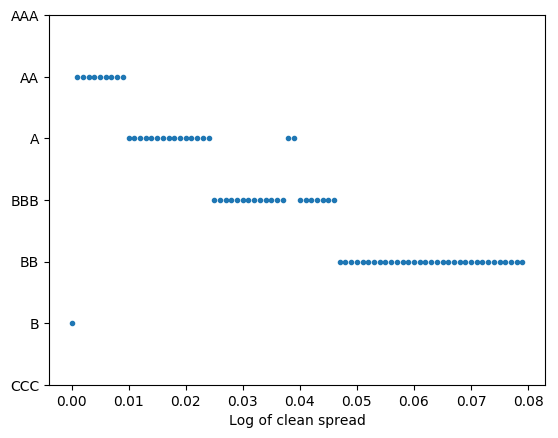

In [0]:
# The quality of the prediction depends on the max_depth used for the trees
# Empirically, we see that max_depth = 10 works fine
PlotRatingStair(rfpipe)

We see a very clear prediction as we would expect when increasing the logarithm of the clean spread as predictor, for a given Tier, Sector and Region.

## Visualizing a tree
The visualization will be easier if the tree is pruned, so we limit *max_depth* to 3.

In [0]:
ratingTree = DecisionTreeClassifier(criterion='gini', max_depth = 3)
ratingTree.fit(x_train, y_train)
ratingTree.score(x_val, y_val)

0.4126315789473684

We will plot the tree and try to explain the branches and information shown. The second part of the pair called 'value' indicates how many samples at that node correspond to each category. The aim is to reach a node where a certain category has the pair $[0, N_{leaf}]$ being $N_{leaf}$ the number of samples in that leaf for the chosen category in that leaf, and $[N_{leaf}, 0]$ for the rest of categories.

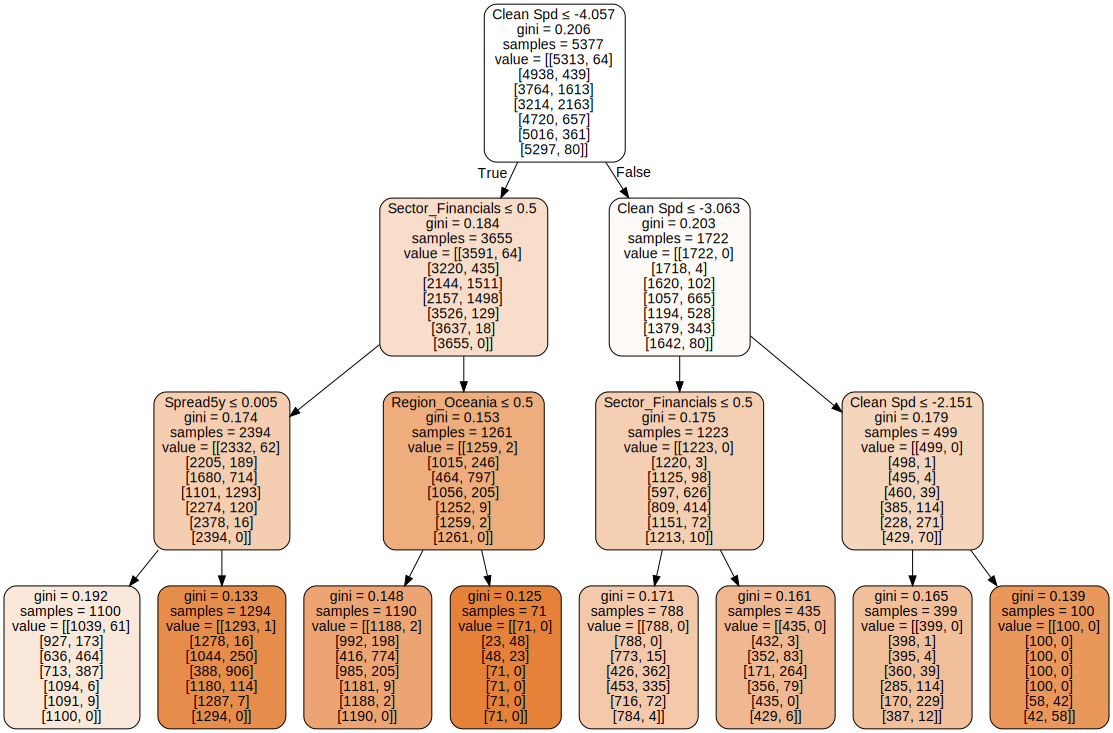

In [0]:
from sklearn.tree import export_graphviz
import pydotplus

# Uncomment this section to export the image to file
# from IPython.display import Image  
# from sklearn.externals.six import StringIO  
# import pydotplus
# dot_data = StringIO()
# export_graphviz(ratingTree, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True, 
#                 feature_names = list(X.columns),
#                 class_names = ratings)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png(CDS_SPREADS_PATH + '/ratingsTree.png')
# Image(graph.create_png())

import graphviz
dot_data = export_graphviz(ratingTree, out_file=None,  
                filled=True, rounded=True,
                special_characters=True, 
                feature_names = list(X.columns),
                class_names = ratings)

graph = graphviz.Source(dot_data)
graph

## Tree hyperparams with GridSearchCV


Decision Trees are prone to overfitting, and so we must use some kind of **pruning** to generate trees that have good generalization properties. scikit-learn implements several **pre-pruning** mechanisms, which stop the splitting procedure of the tree after some conditions are met:

* **max_depth**: maximum depth at which the tree can continue creating splits.
* **min_samples_split**: the minimum number of samples required to split an internal node.
* **min_samples_leaf**: the minimum number of samples required to be at a leaf node.
* **max_leaf_nodes**: the maximum number of leaf (terminal) nodes that are allowed in the tree.
* **min_impurity_decrease**: a node will be split only if the split induces a decrease of the impurity greater than or equal to this value.

These paremeters are usually set through an independent validation set or some kind of cross-validation procedure. Here we will use a cross-validation strategy over the training set to test a range of different pre-pruning strategies. We will do so using the **GridSearchCV** class:

In [0]:
param_grid = {
    "criterion": ['gini', 'entropy'],
    "max_depth": [4, 8, 16, 24, 32],
    "min_impurity_decrease": [0.0, 1e-3, 1e-1],
    "min_samples_leaf": [1, 3, 7],
    "min_samples_split": [2, 5, 7],
    "splitter": ['best', 'random']
            }

# BIG HYPERPARAMETER GRID (takes time to finish calculations)
# param_grid = {
#     "criterion": ['gini', 'entropy'],
#     "splitter": ['best', 'random'],
#     "max_depth": [3, 5, 8, 12, 15, 18, 20, 25],
#     "min_samples_split": [ 2, 5, 10, 15, 20, 25, 30],
#     "min_samples_leaf": [1, 2, 5, 10, 15],
#     "max_features": ['sqrt', 'log2', 0.5, 1.0],
# #     "max_leaf_nodes": [2, 5, 10, 20],
#     "min_impurity_decrease": [0.0, 1e-7, 1e-5, 1e-3, 1e-2, 1e-1]
#             }

# RESULTS OF THE BIG GRID SEARCH:
# {'criterion': 'entropy',
#  'max_depth': 22,
#  'max_features': 1.0,
#  'min_impurity_decrease': 0.0,
#  'min_samples_leaf': 1,
#  'min_samples_split': 2,
#  'splitter': 'random'}

In [0]:
from sklearn.model_selection import GridSearchCV
from IPython.display import clear_output

treesearch = GridSearchCV(
    estimator = DecisionTreeClassifier(), 
    param_grid = param_grid,
    cv = 5,
    n_jobs=-1,
    verbose = 2
)
treesearch.fit(XtrainFull, YtrainFull)

# clear_output()

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 334 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:   52.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 16, 24, 32],
                     

In [0]:
treesearch.cv_results_['mean_test_score']

In [0]:
treesearch.best_params_

{'criterion': 'entropy',
 'max_depth': 32,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [0]:
treesearch.best_score_

0.8778251936146673

In [0]:
from sklearn.metrics import accuracy_score
y_predict = treesearch.predict(Xtest)
accuracy = accuracy_score(Ytest, y_predict)
print('Accuracy of the optimal tree after Grid Search: ', accuracy)

Accuracy of the optimal tree after Grid Search:  0.8934646374216652


Now, training the best model with the whole set of training samples, including the validation set, and check the **final score with test set**:

In [0]:
# We will now train the best tree model found, with the whole training set (train + validation)
best_tree = treesearch.best_estimator_
best_tree.fit(XtrainFull, YtrainFull)

# CHECK FINAL SCORE WITH TEST SET, WHICH WAS  
# RESERVED UNTIL THE END OF THE MODEL TUNING PROCESS
best_tree.score(Xtest, Ytest)

0.9059982094897046

While GridSearchCV is exhaustive,  **sklearn** includes another grid search that is randomized: **RandomizedSearchCV**, which can sample a given number of candidates from a parameter space with a specified distribution.

https://scikit-learn.org/stable/modules/grid_search.html


#Ensemble Machine Learning
Ensemble methods combine several predictors, such as the DecisionTreeClassifier, together in an aggregated way to improve the quality of the fit, lowering the bias and the variance of the individual predictors. Grouping weak learners together to form a strong learner (meta-model).

These methods can be summarized as either **Bagging** or **Boosting**. **Random forests** are a sucessful way of bagging, with added randomization dropping features.


 ## Bagging
 (*Bootstrap Aggregating*) uses several independent predictors, each of them taking a different *bootstrap* resampled dataset,  that are finally aggregated with an average (vote, mean, weights...). Used to decrease the individual model's variance, by introducing randomization into its construction procedure and then making an ensemble out of it.
 
 The resampled datasets are created by **sampling with replacement**, so that there could be repeated samples in the bagging sets.

Bagging creates multiple copies of the original training data set using the bootstrap, fitting a separate decision tree to each copy, and then combining all the trees in order to create a single predictive model (ISL book Hastie).

With B **bootstrapped train sets** obtained from the original, taking repeated samples from the (single) training dataset, there will be B trees, each fitting one of those B datasets. Then, the predictions are done using the average for regression, or the **majority vote** for classification.

$$ \hat{f}_{bag} (x) = \frac{1}{B}\sum_{b=1}^B \hat{f^{*b}}(x) $$

Bagging improves prediction accuracy at the expense of interpretability. We can then use Gini index on the features to try to explain them, to keep some interpretation capability. This can be done adding up the total amount that the Gini index is decreased by splits over a given feature, averaged over all bagged trees.
 
 Bagging performs at its best when the models have high variance.
 
 ### Out-of-bag Error Estimation
 
 This is used to estimate the test error of a bagged model avoiding cross-validation. On average, each bagged tree uses around 2/3 of the  samples, The remaining 1/3 is called **out-of-bag (OOB)**. For each observation $i$, we can predict using 1/3 of the trees, those that were not using that observation $i$ to be trained. We average the result of the B/3 predictions for this $i$ observation, or use the majority vote in case of classification. Doing this with each observation, we obtain an overall OOB MSE (regression), or classification error (classification) as **estimate of the test error**. With large B, is almost as a good estimator as LOOCV (leave-one-out cross validation).
 

Readings in Internet:

>> https://people.cs.pitt.edu/~milos/courses/cs2750-Spring04/lectures/class23.pdf
 
>> https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/
 
 >> https://medium.com/@rrfd/boosting-bagging-and-stacking-ensemble-methods-with-sklearn-and-mlens-a455c0c982de
 

We need to transform our classification of ratings through a **One vs rest Classifier** strategy. This consists in so many binary classifications as the number of classes to classify. We will then classify for 'AA' versus all other possible classes, and so on with all of them. This means building a binary classifier for class 'AA' (with '1' on the 'AA' rows for that column) versus all other one-hot columns having '0' on all of them. Repeating this with each class to classify.


For **Bagging**, we should use deep grown trees, because the bagging method itself will reduce the variance of the results, by feeding different datasets to the tree model, resulting in different fitted trees that could suffer from overfitting to that dataset, but when averaging or aggregating their predictions, the score in the test set will improve over the individual models.

In [0]:
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier

# Instantiation of Bagging Classifier, where we will use the best tree from Grid Search above
ovr_baggingCl_tree = OneVsRestClassifier(BaggingClassifier(base_estimator = best_tree, \
                                                  n_estimators = 200, \
#                                                   oob_score = True, \
                                                  n_jobs=-1))

In [0]:
ovr_baggingCl_tree.fit(x_train, y_train)

OneVsRestClassifier(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                                      criterion='entropy',
                                                                                      max_depth=32,
                                                                                      max_features=None,
                                                                                      max_leaf_nodes=None,
                                                                                      min_impurity_decrease=0.0,
                                                                                      min_impurity_split=None,
                                                                                      min_samples_leaf=1,
                                                                                      min_samples_split=2,
                                       

In [0]:
# We have as many BaggingClassifier estimators as output classes (ratings)
print('Number of estimators in OneVsRest: ', len(list(ovr_baggingCl_tree.estimators_)))
print('Number of output classes: ', len(ratings), ', which equals the number of one-vs-rest classes: ', len(list(ovr_baggingCl_tree.classes_)))
      

Number of estimators in OneVsRest:  7
Number of output classes:  7 , which equals the number of one-vs-rest classes:  7


In [0]:
pred_bagging_tree = ovr_baggingCl_tree.predict(x_val)
print('Accuracy of Bagging with Tree model prediction on validation set:', \
      metrics.accuracy_score(y_val, pred_bagging_tree))

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Accuracy of Bagging with Tree model prediction on validation set: 0.8894736842105263


In [0]:
from sklearn.model_selection import cross_val_score
# Checking now with cross validationg score
bagging_score_tree = cross_val_score(ovr_baggingCl_tree, XtrainFull, YtrainFull, cv=5, n_jobs=-1)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



In [0]:
print('Bagging mean: ', bagging_score_tree.mean())
print('Bagging std: ', bagging_score_tree.std() )

Bagging mean:  0.8738732055773062
Bagging std:  0.010293083042047567


Now we will see how the precision improves as we increase the number of trees in bagging.

In [0]:
bagging_numTrees = np.array([])
bagging_valErr = np.array([])

for i in range(1, 21):
  num_trees = i * 10
  iter_bagTree = OneVsRestClassifier(BaggingClassifier(base_estimator = best_tree, \
                                                  n_estimators = num_trees, \
                                                  random_state = 7,
                                                  n_jobs=-1))
  iter_bagTree.fit(x_train, y_train)
  iter_pred = iter_bagTree.predict(x_val)
  val_error = 1.0 - metrics.accuracy_score(y_val, iter_pred)
  
  bagging_numTrees = np.append(bagging_numTrees, num_trees)
  bagging_valErr = np.append(bagging_valErr, val_error)

In [0]:
bagging_valErr

array([0.13789474, 0.12210526, 0.11894737, 0.12105263, 0.11368421,
       0.11368421, 0.11263158, 0.11263158, 0.10842105, 0.10842105,
       0.11052632, 0.11052632, 0.10947368, 0.10947368, 0.11052632,
       0.10736842, 0.10842105, 0.10947368, 0.10842105, 0.10947368])

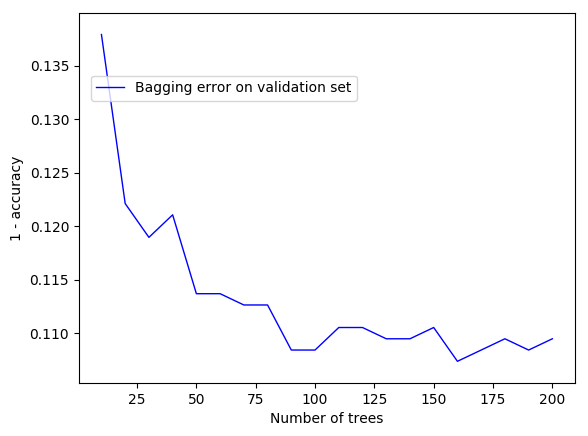

In [0]:
fig = plt.figure()
ax = plt.subplot(111)

for j, lab, ls, c, in zip(
      [bagging_valErr],
      ['Bagging error on validation set'],
      ['-'],
      ['blue']):
   line = ax.plot(bagging_numTrees, j, label=lab, linestyle=ls, lw=1, color=c)

ax.legend(loc='upper left', bbox_to_anchor=(0.01, 0.85),
         ncol=1, fancybox=True, shadow=False)

plt.ylim([bagging_valErr.min() - 0.002, bagging_valErr.max() + 0.002])
plt.xlabel('Number of trees')
plt.ylabel('1 - accuracy')
plt.show()


Just to see that bagging is intended to be used with weak learners, we will now use **Bagging** on a model which is itself also a bagging model: the **Random Forest**, which is explained in the next section. We are using 10 bags of 100-trees random forests, to compare later with a standalone 1000-trees random forest (same depth parameter in all cases). This experiment shows that bagging does not improve so much when using strong learners, it is intended for weak learners such as many decission trees.

In [0]:
# We can use bagging to mix several classifiers from different families
# Using max_samples as a percentage to draw from training set for each estimator
# bootstrap = true (default value) for sampling with replacement.
# We can use also max_features to limit the number of features for each estimator

# Now trying with the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_bag = RandomForestClassifier(n_estimators = 100, max_depth = 15)


baggingCl_rf = OneVsRestClassifier(BaggingClassifier(rf_bag, \
                                                     n_estimators = 10))        
#                                                   max_samples = 0.8, \
#                                                   max_features = 5, \
#                                                   n_jobs=-1))

baggingCl_rf.fit(x_train, y_train)

OneVsRestClassifier(estimator=BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                                                      class_weight=None,
                                                                                      criterion='gini',
                                                                                      max_depth=15,
                                                                                      max_features='auto',
                                                                                      max_leaf_nodes=None,
                                                                                      min_impurity_decrease=0.0,
                                                                                      min_impurity_split=None,
                                                                                      min_samples_leaf=1,
                                             

In [0]:
pred_bagging_rf = baggingCl_rf.predict(x_val)
print('Accuracy of Bagging with Random Forest prediction on validation set:', \
      metrics.accuracy_score(y_val, pred_bagging_rf))

Accuracy of Bagging with Random Forest prediction on validation set: 0.76


In [0]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=5, random_state=111)
results = model_selection.cross_val_score(baggingCl_rf, XtrainFull, YtrainFull, cv=kfold)
print(results.mean())

0.7633960873936148


End of the experiment: bagging must be used with weak learners.


 ### Meta-classification schemes: voting, stacking, grading for several classifiers
 
They are strategies to form a combination of the predictions from several models.
 
  * **Voting** you have some constant method $v$, that given answers $a_1, ..., a_k$ results in $a = v(a_1, ..., a_k)$
  
  * **Stacking**: you use the answers as the new representation of the problem, so for each $(x_i, y_i)$ you get $(a_{i1}, ..., a_{ik})$ and so create the training sample $((a_{i1}, ..., a_{ik}), y_i)$ and train a meta-classifier on it.
 
  * **Grading** you train a separate meta-classifier for each of you $k$ classifiers to predict its "classification grade" for current point, and use it to make decision.
  
 References:
  
https://stackoverflow.com/questions/18803044/what-is-the-difference-between-the-stacking-grading-and-voting-algorithms
 
https://pdfs.semanticscholar.org/53df/bc477ffb016e36d54f98e48695902d8eb566.pdf
 

 
 ## Random forests
 
Random forests work like bagging, but decorrelating the trees not only through the bootstrapped training samples: randomization comes also when randomly selecting a subset of just $m$ features from the total $p$ features to take into account for each tree split, discarding the rest of features. On each split, a random sample of $m$ predictors are chosen from the full set of $p$ predictors, typically using $m \approx \sqrt(p)$

The aim is to have a **large number of weak learners**, which will overall predict better than a single strong learner, on test samples. The weak learners should be as uncorrelated as possible. Regression and Classification Trees, since they are grown with a greedy strategy, tend to grow in a similar fashion, and to avoid this we **hide randomly** a set of features to each tree, forcing that they grown differently, choosing other predictors than the most powerful ones.

There will be less overfitting after this decorrelation of the trees, to get more reliable predictions. If we had highly correlated trees, their average would not reduce variance. They would be "bad models", that would very likely agree on the same bad prediction. We want "bad models" to disagree on the final average.

The random selection of features for each tree, will create **trees that do not see the strongest feature at its top**. This strongest feature would otherwise be always at the top of all trees. There will be an average of $ \frac{p-m}{p} $ splits that will not even consider the strongest predictor.

This way we can reduce the variance and thus the overfitting.

As with bagging, random forests will not overfit if we increase B, the number of trees. Increasing B will reduce the error rate.
 
**Hyperparameters**: $B$ (number of trees) and $m$ (number of features to be randomly selected, from the total $p$ possible features).
 
 Reference for hyperparameters on *sklearn*:
 
 https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
 
 Reading in Internet
 
 https://machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/


In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 2000,
                            # max_features = 'auto' for sqrt(num_features)
                            # criterion = 'entropy',
                            # min_samples_leaf = 5,
                            # max_depth = 32,
                            random_state=0)

In [0]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf = rf.predict(x_val)

In [0]:
import sklearn.metrics as metrics
print('Accuracy of Random Forest prediction on validation set:', \
      metrics.accuracy_score(y_val, y_pred_rf))

Accuracy of Random Forest prediction on validation set: 0.9


* **EXCERCISE:** We can use GridSearchCV with the *RandomForestClassifier* to get the optimum parameters.

In [0]:
# param_grid = {
#     "n_estimators" : [800],
# #     "criterion": ['gini', 'entropy'],
#     "max_depth": [2, 4, 8, 16],
#     "min_samples_split": [ 2, 5, 7],
#     "min_samples_leaf": [1, 3, 7],
#     "min_samples_split": [2, 5],
#     "max_features" : ['sqrt', 'log2'],
# #     "max_leaf_nodes": [2, 5, 10, 20],
#     "min_impurity_decrease": [0.0, 1e-3, 1e-1]
#             }

param_grid = {
    "n_estimators" : [800],
#     "criterion": ['gini', 'entropy'],
    "max_depth": [4, 16],
    "min_samples_split": [ 2, 5],
#     "min_samples_leaf": [1, 3, 7],
    "max_features" : ['sqrt', 'log2'],
#     "max_leaf_nodes": [2, 5, 10, 20],
    "min_impurity_decrease": [0.0, 1e-3]
            }

In [0]:
# UNCOMMENT GRIDSEARCH TO RUN IT (TIME CONSUMING !!!)

treesearch = GridSearchCV(
    estimator = RandomForestClassifier(), 
    param_grid = param_grid,
    cv = 5
)
treesearch.fit(XtrainFull, YtrainFull)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [0]:
print(treesearch.cv_results_['mean_test_score'])
print(treesearch.best_params_)
print(treesearch.best_score_)

[0.2410305  0.23944998 0.18507982 0.18097044 0.22348664 0.22269638
 0.08582266 0.08029082 0.81365576 0.77888415 0.20404615 0.19582741
 0.80638533 0.7706654  0.13481903 0.12991939]
{'max_depth': 16, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_split': 2, 'n_estimators': 800}
0.813655761024182


The resulting hyperparameters from the Grid Search are:

`{'max_depth': 16, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}
0.814287972182709`

 ## Boosting
 
Boosting pipelines a sequence of predictors one after another, fitting the output of one as input for the next. For example, taking the error from one predictor as input for the next one, trying to "fix" those errors from the previous model. Used to decrease the model's bias.

Notice that in boosting there is no bootstrapping on the samples, but instead each tree fits a transformation of the original data set. Specifically, using **weights** for the samples poorly predicted in one step, to feed the next step **as reinforcement to correct that misprediction** (big error for regressions, or misclassification for predictions on classes). Now bagging is not random, but guided for the $n$th model, because the data for the $n$th model has been modified applying weights as a result of the errors made by the previous $(n-1)$th model..
 
 While in Bagging and Random Forest the models were independent and could run in parallel, now models are **sequentially connected**, where the setup of a model depends on the errors made by the previous model, modifying the dataset with new weights. Each model will have a score after this process, so that models with high misclassification errors, will have a smaller weight when voting the results in the prediction, and the most accurate models will be awarded the highest weights when voting for the prediction.
 
 The boosting procedure _learns slowly_, which usually tends to perform well.
 
 **Hyperparameters**: 
  * $B$, the number of trees. Here, a large $B$ can overfit!
  *  $\lambda$ , shrinking parameter that controls the learning speed rate. Typical 0.01 or 0.001.
  * $d$, the number of splits in each tree. Usually very low, even $d=1$ as additive model (each tree being a _stump_ of a single variable)
 
### Boosting algorithm

$B$: the number of trees <br>
$\lambda$: shrinkage parameter <br>
$d$: number of splits <br>
$r_i$:  the residuals <br>
$y_i$:  the predictions <br>

1. Set $\hat{f}(x)=0$ and $r_i = y_i$ for all $i$ in the training set.

2. For $b = 1, 2, ..., B $,  repeat:

>> (a)  Fit a tree $\hat{f^b}$ with $d$ splits ($d+1$ terminal nodes) to the training data $(X, r)$.

>> (b) Update $\hat{f}$ by adding in a shrunken version of the new tree:

>>>> $ \hat{f}(x) \gets \hat{f}(x) + \lambda \hat{f^b}(x)$

>> (c) Update the residuals,

>>>> $r_i \gets r_i - \lambda \hat{f^b}(x_i) $

3. Output the boosted model

>>>>  $ \hat{f}(x) = \displaystyle\sum_{b=1}^{B} \lambda \hat{f^b} (x)  $

[ref: algorithm 8.2 from http://www-bcf.usc.edu/~gareth/ISL/] <br>
See also https://statweb.stanford.edu/~jhf/ftp/trebst.pdf

https://www.python-course.eu/Boosting.php


In Gradient Boosting, there is a chain of predictors, where each predictor corrects the error of the previous one. As an informal summary:
___

>> 1.- Fit a model to the data.  $ F_1(x) = \hat{y} $

>> 2.- Fit a model to the residuals.  $ h_1(x)=\hat{y}-F_1(x) $

>> 3.- Create a new model.  $ F_2(x) = F_1(x)+h_1(x) $
___

And then generalize to N models

With problems like ours where there are many categorical and binary variables, vanilla gradient descent would get stuck during the optimization process, because of many local minima.

Instead of gradient descent, we then use boosting. This method uses a bagging of weaker classifier altogether providing an overall prediction (*Bagging*). But now the prediction error of this Bagging, along with their prediction, is fitted to the next stage. Is a gradient descent optimization on the output of the Bagging.


[http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting ]

https://medium.com/@rrfd/boosting-bagging-and-stacking-ensemble-methods-with-sklearn-and-mlens-a455c0c982de

The reference from sklearn:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier


params_gb = {'n_estimators': 500, 'max_depth': 10, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 2, 'random_state': 0}

ovr_gbc = OneVsRestClassifier(GradientBoostingClassifier(**params_gb))

ovr_gbc.fit(x_train, y_train)

OneVsRestClassifier(estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.01,
                                                         loss='deviance',
                                                         max_depth=10,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=2,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estima

In [0]:
pred_gbc = ovr_gbc.predict(x_val)
print('Accuracy of Gradient Boosting prediction on validation set:', \
      metrics.accuracy_score(y_val, pred_gbc))

Accuracy of Gradient Boosting prediction on validation set: 0.7989473684210526


We will now search for the best hyperparameters on a cross-validation

When you use nested estimators with grid search you can scope the parameters with __ as a separator. Here, the Gradient Boosting Classifier is stored as an attribute with name `estimator` inside the `oneVsRestClassifier` model.

In [0]:
param_grid_estimator = {
    "estimator__n_estimators" : [100, 200],
    "estimator__max_depth": [3, 8, 16],
    "estimator__subsample": [0.5, 1.0],
    "estimator__min_samples_split": [ 2, 5],
#     "min_samples_leaf": [1, 2],
#     "max_features" : ['sqrt', 'log2'],
#     "max_leaf_nodes": [2, 5, 10, 20],
#     "min_impurity_decrease": [0.0, 1e-3]
            }

In [0]:
model_ovr_gbc = OneVsRestClassifier(GradientBoostingClassifier())

treesearch = GridSearchCV(
    estimator = model_ovr_gbc,
    param_grid = param_grid_estimator,
    cv = 4
)
treesearch.fit(XtrainFull, YtrainFull)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=OneVsRestClassifier(estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                                                init=None,
                                                                                learning_rate=0.1,
                                                                                loss='deviance',
                                                                                max_depth=3,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                  

In [0]:
print(treesearch.cv_results_['mean_test_score'])
print(treesearch.best_params_)
print(treesearch.best_score_)

[0.6036036  0.59585902 0.66303145 0.65038723 0.61245456 0.59664928
 0.65639324 0.65433855 0.80116959 0.80132764 0.83783784 0.83135767
 0.79943101 0.80512091 0.83515094 0.8359412  0.84589853 0.83183183
 0.84984985 0.8326221  0.8470049  0.83625731 0.84811127 0.83641536]
{'estimator__max_depth': 16, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 200, 'estimator__subsample': 0.5}
0.8498498498498499


`[0.6036036  0.59585902 0.66303145 0.65038723 0.61245456 0.59664928
 0.65639324 0.65433855 0.80116959 0.80132764 0.83783784 0.83135767
 0.79943101 0.80512091 0.83515094 0.8359412  0.84589853 0.83183183
 0.84984985 0.8326221  0.8470049  0.83625731 0.84811127 0.83641536]
{'estimator__max_depth': 16, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 200, 'estimator__subsample': 0.5}
0.8498498498498499 `

In [0]:
# ovr_gbc.decision_function
pred_proba_gb = ovr_gbc.predict_proba(x_val).reshape(1, -1)
pred_proba_gb.shape
x_val.shape

(950, 30)